# **Employee Retention Analysis for HR and Consulting Firms**

### Business Scenario and Problem
The HR department at Salifort Motors, a large ficticious consulting firm, has asked us to conduct an in-depth analysis of employee retention and to develop a predictive model that can help us predict whether employees will be retained or depart. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company and building a robust model would help in identifying factors that would improve retention. Therefore, the goal is to provide our stakeholders with a 1-page summary that outlines the findings of our analysis and the implications for the firm.

### HR Dataset

This dataset contains 15,000 rows and 10 columns. The source can be found on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

# Planning

### Import Packages

In [3]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from sklearn.svm import SVC
from xgboost import XGBRegressor
from xgboost import plot_importance
from xgboost import XGBClassifier, plot_tree

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report,\
precision_recall_curve, auc, roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load Dataset

In [4]:
employee_data = pd.read_csv('HR_capstone_dataset.csv')
employee_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## EDA
1. Understand variables
2. Rename columns
3. Clean dataset (missing data, redundant data, outliers)

### 1. Gather Information About the Data

In [5]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
employee_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### 2. Rename Columns

In [7]:
employee_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
employee_data = employee_data.rename(columns = {'Work_accident': 'accident',
                          'average_montly_hours': 'hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department',
                          'number_project': 'num_project',
                          'promotion_last_5years': 'promotion', 
                          'last_evaluation': 'eval'})
employee_data.head()

,satisfaction_level,eval,num_project,hours,tenure,accident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### 3a) Check Missing Values

In [9]:
employee_data.isna().sum()

satisfaction_level    0
eval                  0
num_project           0
hours                 0
tenure                0
accident              0
left                  0
promotion             0
department            0
salary                0
dtype: int64

### 3b) Check Duplicates

In [10]:
print('Amount of duplicates: {:,}'.format(employee_data.duplicated().sum()))
print('Percent of duplicates: {:.1%}'.format(employee_data.duplicated().mean()))

Amount of duplicates: 3,008
Percent of duplicates: 20.1%


In [11]:
# Inspect duplicate rows
employee_data[employee_data.duplicated()]

,satisfaction_level,eval,num_project,hours,tenure,accident,left,promotion,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [12]:
# Remove duplicate rows
df = employee_data.drop_duplicates(keep = 'first').reset_index(drop = 'index')
df.head()

,satisfaction_level,eval,num_project,hours,tenure,accident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### 3c) Check Outliers

In [13]:
def detect_outliers(df, column_names):
    '''
    Detect outliers in the specified columns of a DataFrame and visualize them using boxplots.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column_names (list): A list of column names to analyze for outliers.

    Returns:
        pd.DataFrame: A DataFrame containing outlier information for each column.

    The function calculates the first quartile (Q1) and third quartile (Q3) for each column,
    then computes the interquartile range (IQR) and defines lower and upper limits for outlier detection.
    The function then creates boxplots for each specified column and marks the lower and upper limits as red dashed lines.
    Outliers are identified and displayed in the boxplots.
    The function also returns a DataFrame with information about the number of outliers and their percentage for each column.
    '''
    num_columns = min(len(column_names), 3)
    num_rows = (len(column_names) + num_columns - 1) // num_columns
    outlier_data = []  # To store outlier information for each column

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(5 * num_columns, 5 * num_rows))

    for i, column_name in enumerate(column_names[:num_rows * num_columns]):
        data = df[column_name]
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        low_lim = q1 - 1.5 * iqr
        upp_lim = q3 + 1.5 * iqr

        # Find and display outliers
        outliers = df[(data < low_lim) | (data > upp_lim)][column_name]
        num_outliers = len(outliers)
        percent_outliers = round(num_outliers / len(df) * 100, 1)

        outlier_data.append([column_name, num_outliers, percent_outliers, round(low_lim, 1), round(upp_lim, 1)])

        # Create a boxplot to visualize the distribution and detect any outliers
        sns.boxplot(x = data, ax = axes[i // num_columns, i % num_columns])
        axes[i // num_columns, i % num_columns].set_title(column_name.capitalize())
        axes[i // num_columns, i % num_columns].set_xlabel(column_name)
        axes[i // num_columns, i % num_columns].axvline(low_lim, color = 'red', linestyle = '--', label = f'Lower Limit: {low_lim:.1f}')
        axes[i // num_columns, i % num_columns].axvline(upp_lim, color = 'red', linestyle = '--', label = f'Upper Limit: {upp_lim:.1f}')
        axes[i // num_columns, i % num_columns].legend()

    plt.tight_layout()
    plt.show()

    # Combine the outlier information into a DataFrame
    outlier_df = pd.DataFrame(outlier_data, columns = ['Column', 'Number of Outliers', '% Outliers', 'Lower Limit', 'Upper Limit'])
    return outlier_df

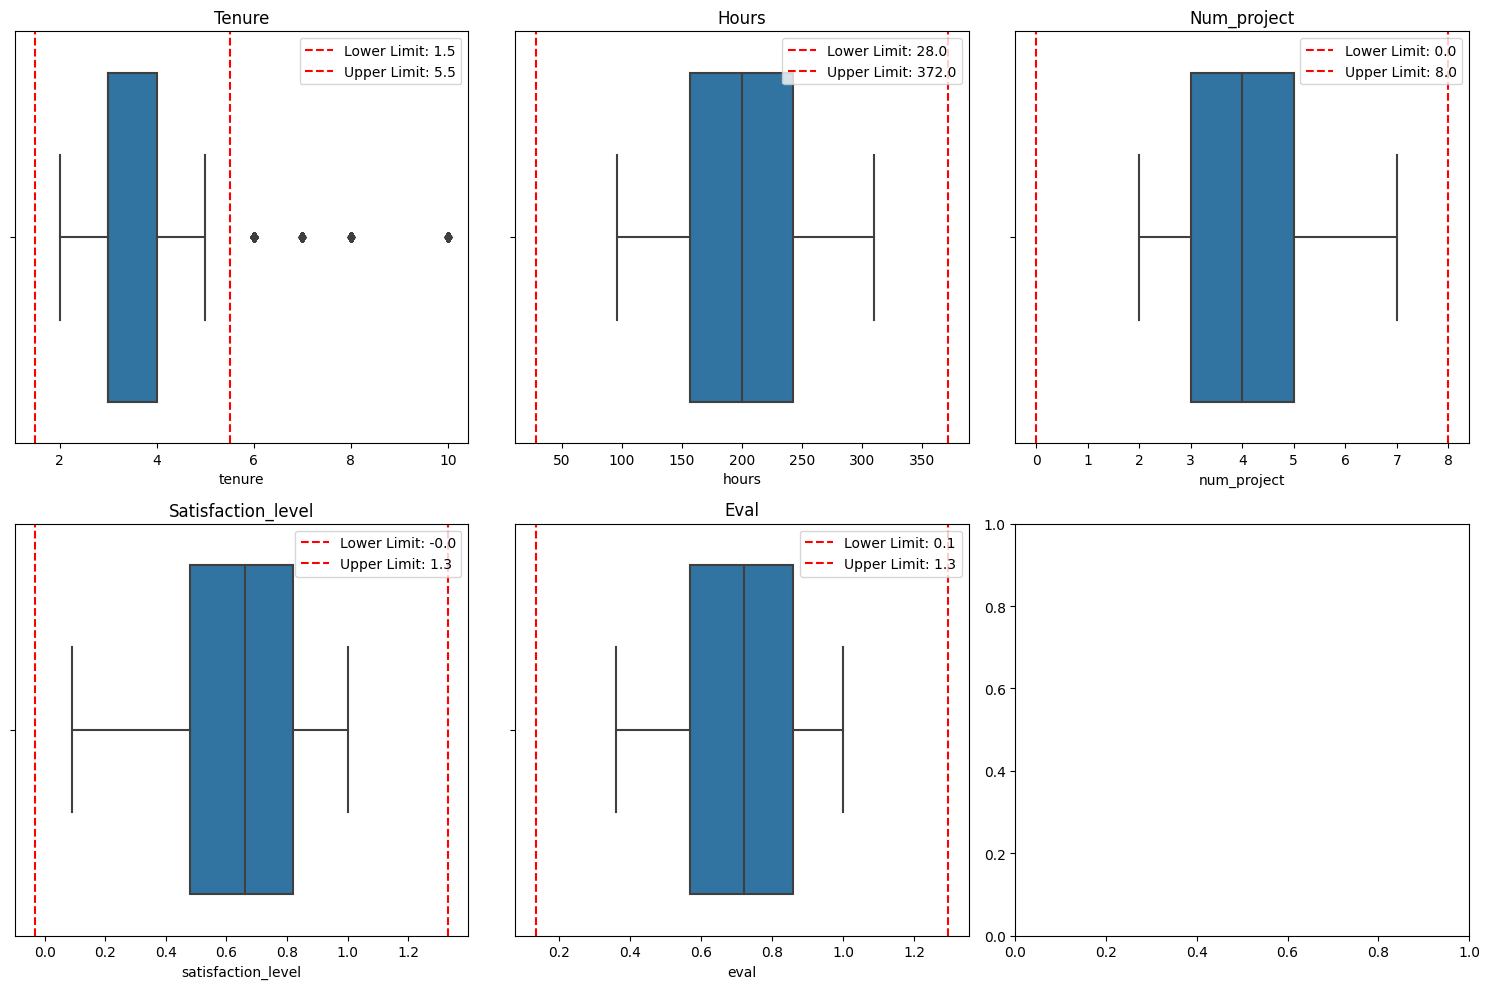

,Column,Number of Outliers,% Outliers,Lower Limit,Upper Limit
0,tenure,824,6.9,1.5,5.5
1,hours,0,0.0,28.0,372.0
2,num_project,0,0.0,0.0,8.0
3,satisfaction_level,0,0.0,-0.0,1.3
4,eval,0,0.0,0.1,1.3


In [14]:
# Add the column names you want to plot
columns_to_plot = ['tenure', 'hours', 'num_project', 'satisfaction_level', 'eval']
detect_outliers(df, columns_to_plot)

# Analysis - Further EDA

### Exploring Employee Retention (Target)

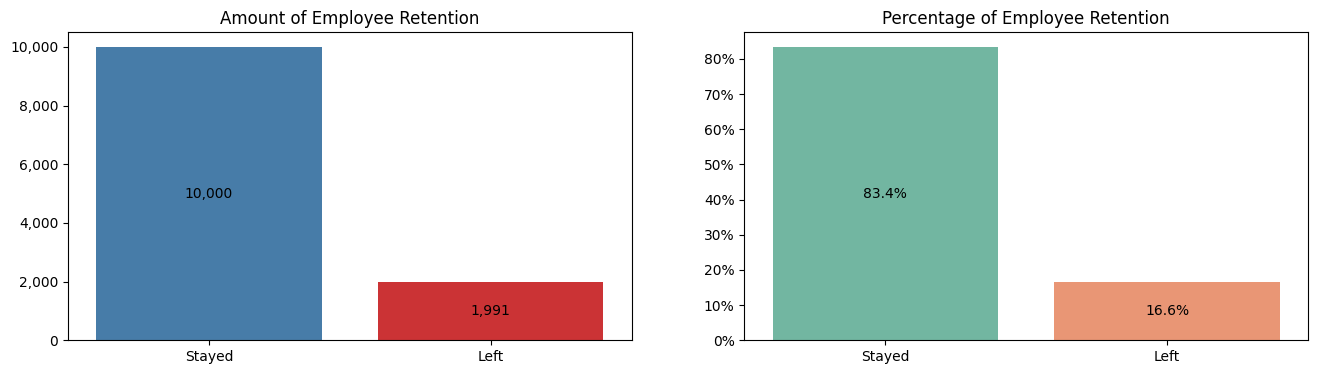

In [13]:
# Get counts and percentages of people who left vs. stayed
count_df = df['left'].value_counts()
per_df = df['left'].value_counts(normalize = True)

fig, ax = plt.subplots(1, 2, figsize = (16, 4))
label = ['Stayed', 'Left']
color_c = sns.color_palette('Set1', n_colors = len(label))[::-1]
color_p = sns.color_palette('Set2', n_colors = len(label))

# Plot the bar chart for employee retention count
sns.barplot(x = label, y = count_df.values, palette = color_c, ax = ax[0])
ax[0].set_title('Amount of Employee Retention')
ax[0].yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Display values on top of each bar
for i, v in enumerate(count_df.values):
    ax[0].text(i, v/2, '{:,}'.format(v), ha = 'center', va = 'center')

# Plot the bar chart for employee retention count as a percentage
sns.barplot(x = label, y = per_df.values, palette = color_p, ax = ax[1])
ax[1].set_title('Percentage of Employee Retention')
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))

# Display values on top of each bar
for i, v in enumerate(per_df.values):
    ax[1].text(i, v/2, '{:.1%}'.format(v), ha = 'center', va = 'center')

plt.show()

The ratio bewteen retained and exited employes is about 5:1, which is not ideal considering 5 employees would stay while 1 leaves. However, that is what we're trying to predict and address with our model! Also notable is the huge inbalance in the data, having less than 17% positive in the data. Using a precision-recall curve would be more appropriate to measure our metrics at the end of model building.

### Exploring Average Monthly Hours and Number of Projects 

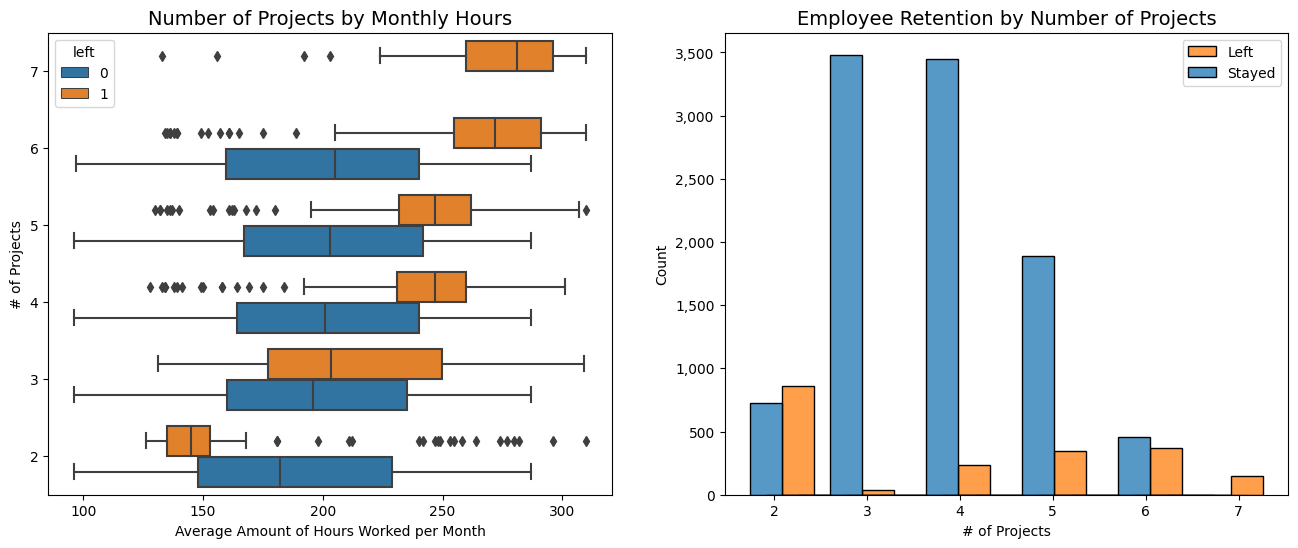

In [14]:
# Create a plot as needed
fig, axes = plt.subplots(1, 2, figsize = (16, 6))

sns.boxplot(data = df, 
            x = 'hours', 
            y = 'num_project', 
            hue = 'left', 
            orient = 'h',
            ax = axes[0])
axes[0].invert_yaxis()
axes[0].set_title('Number of Projects by Monthly Hours', fontsize = 14)
axes[0].set_ylabel('# of Projects')
axes[0].set_xlabel('Average Amount of Hours Worked per Month')

sns.histplot(data = df,
             x = 'num_project',
             hue = 'left',
             multiple = 'dodge',
             shrink = 4,
             ax = axes[1])
axes[1].set_title('Employee Retention by Number of Projects', fontsize = 14)
axes[1].legend(['Left', 'Stayed'])
axes[1].set_xlabel('# of Projects')
axes[1].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: format(int(x), ',')))

plt.show()

# Define a dictionary to map the values of 'left' column to meaningful labels
retention = {1: 'Left', 0: 'Stayed'}

# Calculate and print value counts for 'left' column where 'num_project' is 2
project_mask = df['num_project']
project2 = df[project_mask == 2]['left'].value_counts().rename_axis('Assigned 2 Projects').rename(index = retention)
hours2 = df[(project_mask == 2)].groupby('left')['hours'].mean().round(1)

# Calculate and print value counts for 'left' column where 'num_project' is 7
project7 = df[project_mask == 7]['left'].value_counts().rename_axis('Assigned 7 Projects').rename(index = retention)
hours7 = df[(project_mask == 7)].groupby('left')['hours'].mean().round(1)

# Calculate and print the median monthly hours for employees who were assigned 7 projects and left
avg_h = df.groupby('left')['hours'].mean().round(1).rename_axis('Average Monthly Hours by Employee Retention').rename(index = {0: 'Stayed', 1: 'Left'})
total_avg_h = round(df['hours'].mean(), 1)

| Employee Retention | Average Monthly Hours |
|--------------------|----------------------|
|      Stayed        |        198.9         |
|       Left         |        208.2         |

| Assigned Projects | Stayed (Count) | Stayed (Hours) | Left (Count) | Left (Hours) |
|-------------------|----------------|----------------|--------------|--------------|
|       2 (min)     |      725       |     186.9      |     857      |    146.1     |
|       7 (max)     |      NA        |      NA        |     145      |    275.6     |

A clear and understandable positive correlation between number of projects and employees leaving is observed. Some other highlights include:
1. It seems that at 7 projects all employees eventually left the company (n = 145) with a median ~280 hours worked monthly.
2. A small group of employees that left were working significantly under the average hours compared to their peers for 4 projects and more. Despite this, on average, those who left worked more hours monthly than their retained counterparts (~270 hours vs ~200 hours)
3. Considering the average amount of hours worked monthly by all employees (200.5 hours), this is considerably higher than the expected amount of 160 hours based on a 40 h/week schedule. Perhaps employee satisfaction would be affected as a result. A good observation would be the employees that were assigned 2 projects, worked significantly more hours than the average employee, and eventually left.
4. At 3-4 projects, employee retention remains stable and effective.

### Exploring Average Monthly Hours and Satisfaction

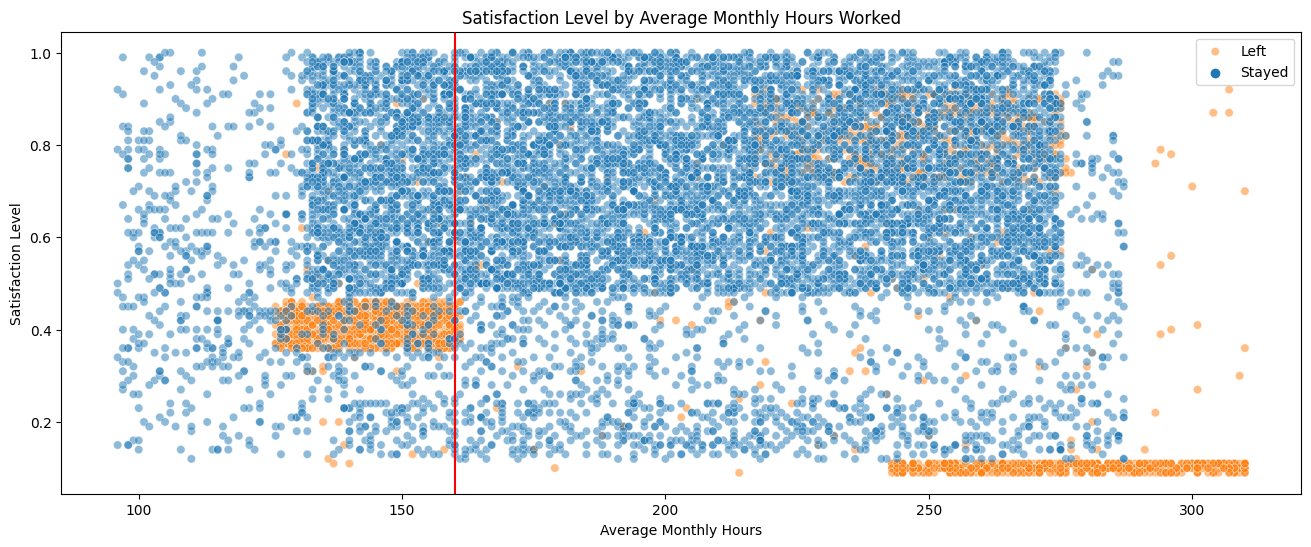

In [15]:
plt.figure(figsize = (16, 6))
sns.scatterplot(data = df,
                x = 'hours', 
                y = 'satisfaction_level', 
                hue = 'left',
                alpha = 0.5)
plt.axvline(x = 160, color = 'red', ls = '-')
plt.legend(['Left', 'Stayed'])
plt.title('Satisfaction Level by Average Monthly Hours Worked')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')

plt.show()

avg_satisfaction = df['satisfaction_level'].mean()

The graph shows that a large majority of employees work more than the usual 160 hours/week. Specifically:
1. Most employees that left reported a satisfaction level under the average level of 0.6.
2. There is a sparse group of employees that left that worked roughly 225 - 275 hours and reported 0.7 - 0.9 satisfaction level.
3. Additionally, there is a large group of employees that left that reported unsatisfaction (~0.4) and worked under the average amount of hours.
4. Finally, there is a group of severely unsatisfied (< 0.1) employees who left and worked between 240 and 325 hours.

### Exploring Satisfaction Level and Tenure

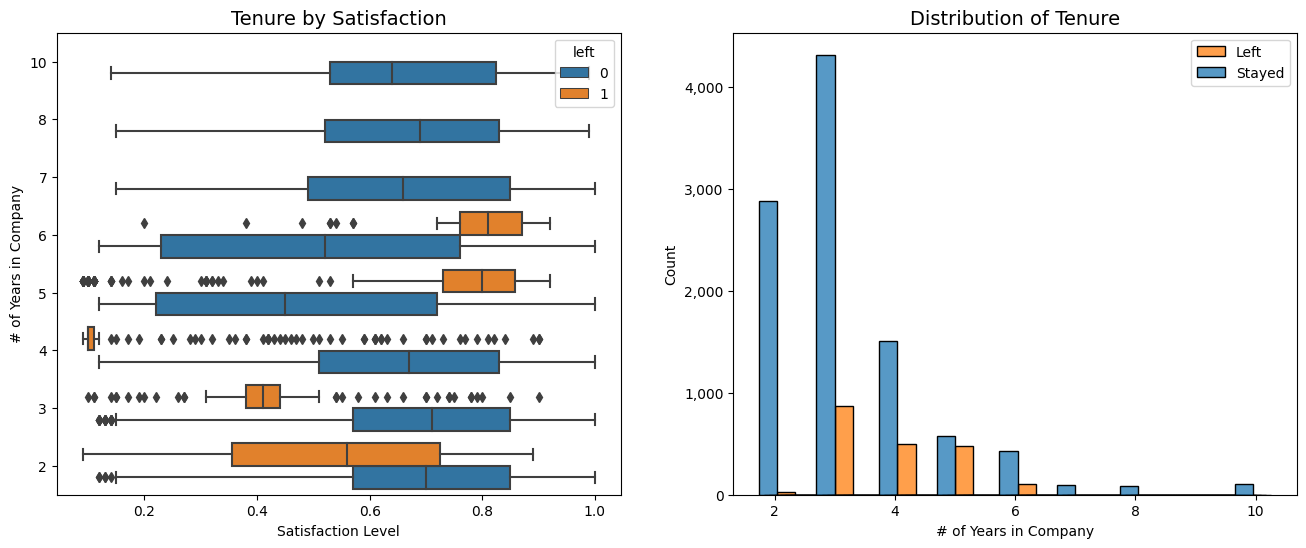

In [16]:
fig, axes = plt.subplots(1, 2, figsize = (16, 6))

sns.boxplot(data = df,
            x = 'satisfaction_level',
            y = 'tenure',
            hue = 'left',
            orient = 'h',
            ax = axes[0])
axes[0].invert_yaxis()
axes[0].set_title('Tenure by Satisfaction', fontsize = 14)
axes[0].set_ylabel('# of Years in Company')
axes[0].set_xlabel('Satisfaction Level')

sns.histplot(data = df,
             x = 'tenure',
             hue = 'left',
             multiple = 'dodge',
             shrink = 7,
             ax = axes[1])
axes[1].legend(['Left', 'Stayed'])
axes[1].set_xlabel('# of Years in Company')
axes[1].set_title('Distribution of Tenure', fontsize = 14)
axes[1].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: format(int(x), ',')))

plt.show()

avg_satisfaction_by_retention = df.groupby('left')['satisfaction_level'].mean().rename_axis('Average Satisfaction by Employee Retainment').rename(index = retention)

perc_at_4_years = df[df['tenure'] <= 4]['left'].value_counts()/df['left'].value_counts()

| Employee Retainment | Average Satisfaction |
|---------------------|----------------------|
| Stayed              |         0.7          |
| Left                |         0.4          |

| Tenure          | Stayed     | Left     |
|-----------------|------------|----------|
| &le; 4 years    |   87.1%    |   70.3%  |

A negative correlation between the tenure of employees who left and satisfaction is observed (as the years progress in employment, satisfaction levels drop). However, for employees, who stayed passed 4 years and left, reported a high average satisfaction (~0.8) perhaps due to company loyalty.  
Some other noticeable events include:
1. At 4 and 5 years of tenure for employees that left, a large degree of outliers can be seen reporting increasing levels of satisfaction and decreasing levels of satisfaction, respectively. Perhaps a high fluctuation due to employees experiencing their 4-year milestone.
2. A trend is observed where after 4 years, satsifaction increases for retained employees, indicating building loyalty.
3. On average, employees who left are less satisfied than employees who stayed (0.4 vs 0.7).
4. The employees that stayed past the 4-year mark show a decline in satisfaction, excluding those that stayed passed 6 years.
5. There are no employees that left after 6 years of tenure. Perhaps an indication that by 7 years time, a strong investment/loyalty has been established with the firm.
6. 70.3% of employees who departed left by year 4 at the company.

### Exploring Department and Promotion 

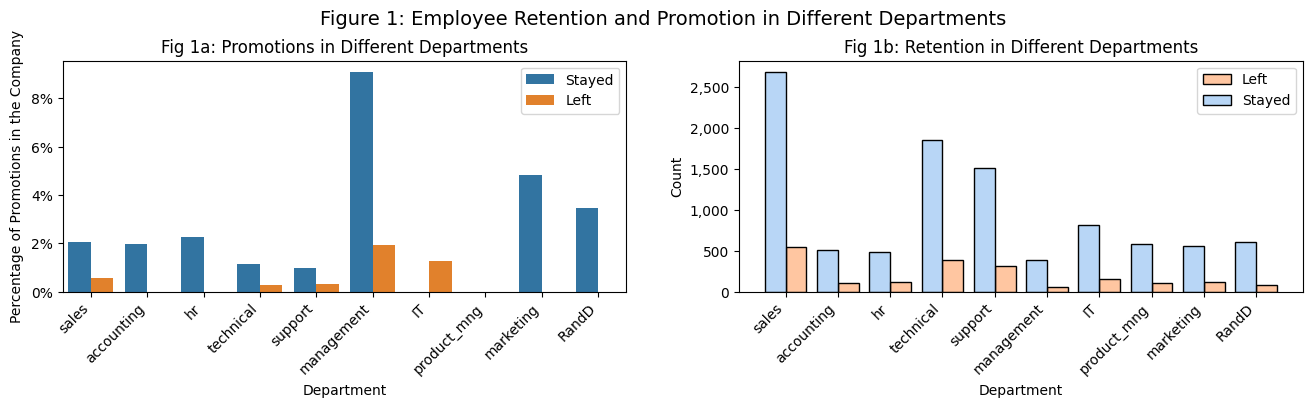

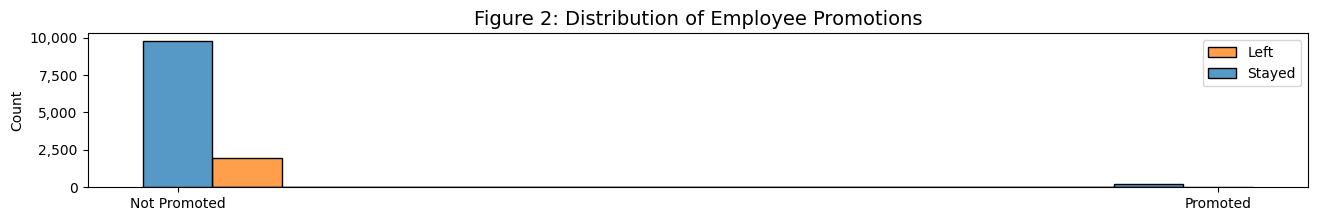

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (16, 3))

sns.barplot(data = df,
            x = 'department',
            y = 'promotion',
            hue = 'left',
            ci = None,
            ax = ax[0])
fig.suptitle('Figure 1: Employee Retention and Promotion in Different Departments', fontsize = 14, y = 1.05)
ax[0].legend(label)
ax[0].set_title('Fig 1a: Promotions in Different Departments')
ax[0].set_xlabel('Department', labelpad = 5)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 45, ha = 'right')
ax[0].set_ylabel('Percentage of Promotions in the Company', labelpad = 5)
ax[0].yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))

sns.histplot(data = df,
             x = 'department',
             hue = 'left',
             multiple = 'dodge',
             shrink = 0.8,
             palette = 'pastel',
             ax = ax[1])

ax[1].legend(label[::-1])
ax[1].set_title('Fig 1b: Retention in Different Departments')
ax[1].set_xlabel('Department', labelpad = 5)
x_labels = df['department'].unique()
ax[1].set_xticks(np.arange(len(x_labels)))
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 45, ha = 'right')
ax[1].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: format(int(x), ',')))

fig, ax2 = plt.subplots(1, 1, figsize = (15.75, 2))

sns.histplot(data = df,
             x = 'promotion',
             hue = 'left',
             multiple = 'dodge',
             shrink = 2)
ax2.set_title('Figure 2: Distribution of Employee Promotions', fontsize = 14)
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['Not Promoted', 'Promoted'])
ax2.set_xlabel('')
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: format(int(x), ',')))
plt.legend(label[::-1])

plt.show()

department = df.groupby('department')['left'].value_counts(normalize = True).rename_axis(index = {'department': 'Department', 'left': ''}) * 100
department.index = department.index.set_levels(label, level = '')
department_df = department.unstack(level = '')

promoted_label = {0: 'No', 1: 'Yes'}
promoted = df['promotion'].value_counts().rename_axis('Promoted').rename(index = promoted_label)

promoted_perc = promoted/promoted.sum() * 100

retention_by_promotion = df.groupby('promotion')['left'].value_counts(normalize = True) * 100
retention_by_promotion = retention_by_promotion.rename_axis(index = {'promotion': 'Promoted', 'left': ''})
retention_by_promotion.index = retention_by_promotion.index.set_levels([list(promoted_label.values()), label], level = ['Promoted', ''])
retention_df = retention_by_promotion.unstack(level = '')

**Figure 1a)** Management and Marketing have taken the most amount of promotions at roughly 11% and 5%, respectively. In addition, they hold the most amount of promoted retained employees. This perhaps could be an indication that promotion is a strong predictor of employee retention. However, ironically, management holds the highest amount of exited employees. This is probably due to the high stress nature of the job. It can still be observed that those departments that have promotions roughly &ge; 2% do not have any employees exiting except for sales and management.

**Figure 1b)**
| Department   | % Stayed | % Left |
|--------------|--------|----------|
| IT           |  83.8  | 16.2     |
| RandD        |  87.8  | 12.2     |
| accounting   |  82.4  | 17.6     |
| hr           |  81.2  | 18.8     |
| management   |  88.1  | 11.9     |
| marketing    |  83.4  | 16.6     |
| product_mng  |  84.0  | 16.0     |
| sales        |  83.0  | 17.0     |
| support      |  82.9  | 17.1     |
| technical    |  82.6  | 17.4     |

As shown, thankfully a majority of employees have stayed while an average of 16.1% of employees leave. The best departments at retaining their employees are RandD, a ficticious department, and management, demonstrating a low 12.2% and 11.9%, respectively. On the other end, the HR department holds the highest employee exit rate of 18.8%.

**Figure 2)**
| Promoted | # of Employees |
|----------|----------------|
| No       |  11788 (98.3%) |
| Yes      |  203 (1.7%)    |

| Promoted | % Stayed | % Left |
|----------|--------|----------|
| No       |  83.2  | 16.8     |
| Yes      |  96.1  |  3.9     |

Very clearly the company does not promote many employees, giving only 203 promotions in the past 5 years. That's only a 1.7% promotion rate compared to being denied 98.3% of the time for 5 years! Arguably, the low promotion rate should be affecting employee retention. In fact, a noticiable difference can be seen in the amount of exited employees when denied a promotion (3.9% to 16.8%).

### Exploring Employee Evaluation and Salary

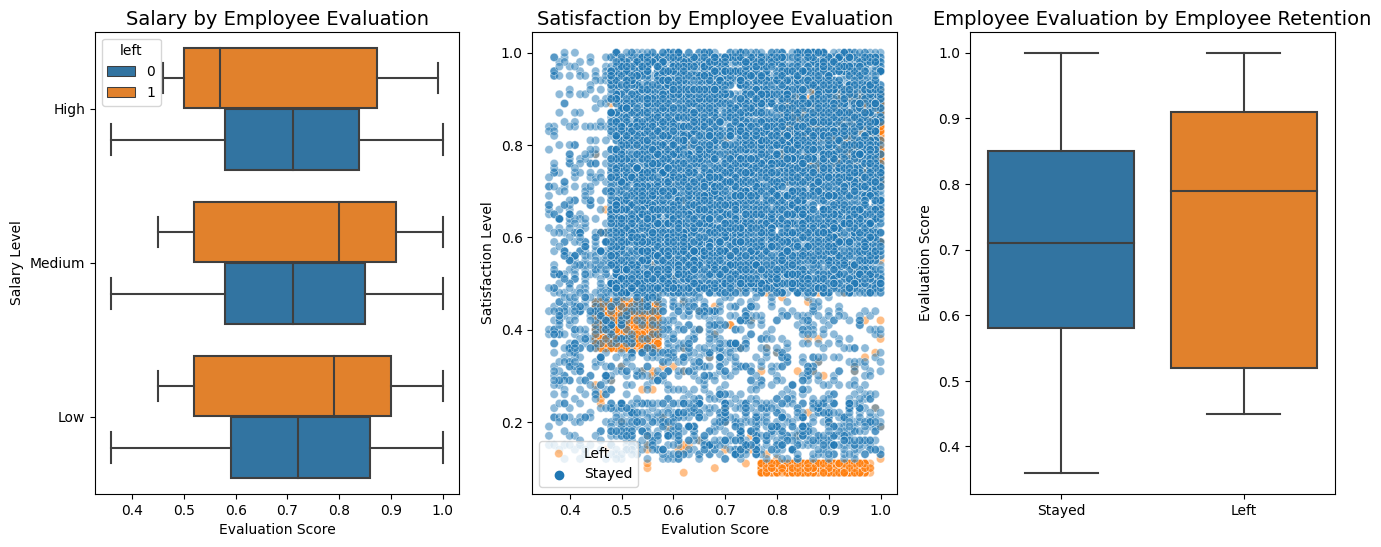

In [18]:
fig, ax = plt.subplots(1, 3, figsize = (16, 6))

sns.boxplot(data = df,
            x = 'eval',
            y = 'salary',
            hue = 'left',
            ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Salary by Employee Evaluation', fontsize = 14, pad = 5)
ax[0].set_xlabel('Evaluation Score')
ax[0].set_yticks([0, 1, 2])
ax[0].set_yticklabels(['Low', 'Medium', 'High'])
ax[0].set_ylabel('Salary Level')

sns.scatterplot(data = df,
                x = 'eval',
                y = 'satisfaction_level',
                hue = 'left',
                alpha = 0.5,
                ax = ax[1])
ax[1].legend(['Left', 'Stayed'])
ax[1].set_title('Satisfaction by Employee Evaluation', fontsize = 14, pad = 5)
ax[1].set_xlabel('Evalution Score')
ax[1].set_ylabel('Satisfaction Level')

sns.boxplot(data = df,
            x = 'left',
            y = 'eval', 
            ax = ax[2])
ax[2].set_title('Employee Evaluation by Employee Retention', fontsize = 14, pad = 5)
ax[2].set_xlabel('')
ax[2].set_xticks([0, 1])
ax[2].set_xticklabels(['Stayed', 'Left'])
ax[2].set_ylabel('Evaluation Score')

plt.show()

salary_eval = df.groupby(['salary', 'left'])['eval'].mean()

eval_retention = df.groupby('left')['eval'].agg(['mean', 'min'])

It is observed that when separated by salary level on average employees who left receive higher evaluation scores excluding those in the high salary range. Though 25% of those who left with a high salary did receive an evaluation score comparable to their retained counterparts. Overall, the evaluations for retained and departed employees are not significantly different.

| Salary  | Employee Status | Avg Employee Evaluation Score |
|---------|-----------------|-------------------------------|
| High    | Stayed          | 0.708                         |
|         | Left            | 0.683                         |
| Low     | Stayed          | 0.718                         |
|         | Left            | 0.722                         |
| Medium  | Stayed          | 0.715                         |
|         | Left            | 0.725                         |

As seen in the scatterplot, the majority of departed employees reported low satisfaction scores (less than average level of 0.6) regardless of a high evaluation score (0.8 - 1.0). This is possibly due to the employee already not enjoying the workplace despite the employee's performance. By this logic, evaluation score should have little impact to satisfaction levels and employee retention. However, it must be noted that a small group of departed employees did report a high satisfaction level (~0.8) after receiving a high evaluation score (0.9 - 1.0). For retained employees, there appears to be a positive correlation between evaluation score and satisfaction levels.

Furthermore, despite having similar evaluation scores on average, 50% of those who left received nearly 0.1 higher in evaluation scores than retained employees. Additionally, retained employees have a larger spread of evaluation scores with less than 25% tending to receive lower scores than their departed counterparts. The lowest score for employees who stayed is also 0.09 lower than the lowest score of the employees who left. Conclusively, the departed employees ironically received better scores overall than retained employees.

| Employee Status | Avg Evaluation Score | Min Score | 
|-----------------|----------------------|-----------|
| Stayed          | 0.716                | 0.36      |
| Left            | 0.722                | 0.45      |


### Insights

1. Positive correlation between the number of projects and employee turnover, with a significant spike at 7 projects.
2. Employees who left worked more hours on average and reported lower satisfaction levels; employees currently have high average monthly hours (201 > 160 hours).
3. Negative correlation between tenure and satisfaction among departed employees, though milestones like the 4-year mark influence satisfaction fluctuations (~70% of departed employees leave by 4 years). Strong loyalty observed after 6 years, with no employees leaving at this point.
4. Promotion is a strong indicator of employee retention.
5. The average evaluation scores of departed and retained employees are similar, though those who left received better overall scores. 

**Additional Insight:** Conducting exit interviews would provide further valuable information into reasons for departure.

# Construction

## Model Building
1. Define prediction task and performance metrics
2. Determine which models are most appropriate
3. Select dependent variables
4. Transform data and encode variables (as needed)
5. Create the train and test data
6. Construct the model
7. Confirm model assumptions

### 1. Identifying Prediction Task

The stakeholders want to be able to predict employee retention. Therefore, we will construct a model that can accuractely perform classification of employees as leaving (1) or staying (0). In this task, we aim to avoid false positives where the model labels an employee as leaving when the employee is actually staying and false negatives where the model labels the employee as staying when the employee is actually leaving. However, reducing the false positive rate would be more crucial since mislabeling an employee as leaving would inappropriately shift management's attitude towards that employee and realocate resources unecessarily. Therefore, **precision** will be our primary metric, but an **F1** score will still be measured for model performance. Additionally, we will use a **precision-recall curve**, since the class distribution is highly imbalanced (5:1 stayed vs left) and the positive class is rare (16.6% occurrence). to support our evaluation of the model's performance.

### 2. Identifying Appropriate Models

Since this is a classification task where the outcomes are binary (staying = 0 and leaving = 1), the following models are suitable for this task:

1. Logistic regression
2. Random Forest (XGBoost)
3. Support Vector Machine (SVM)

### 3. Selecting Independent Variables

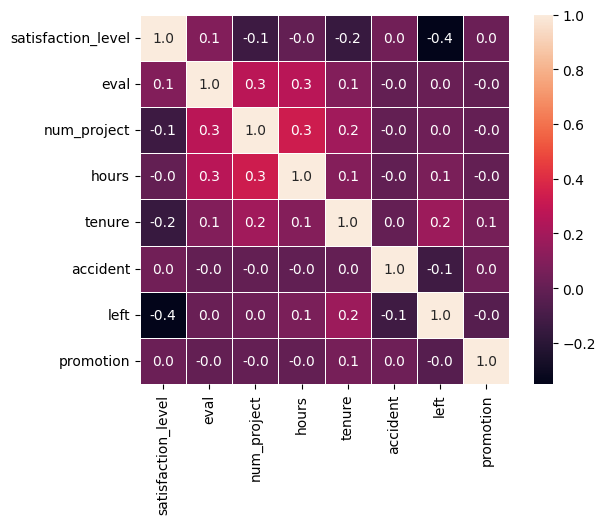

In [19]:
# Create correlation matrix
heatmap = df.drop(columns = ['department', 'salary']).corr()

# Create heatmap
sns.heatmap(heatmap, 
            annot = True, 
            fmt = '.1f', 
            square = True, 
            linewidths = 0.5);

Thankfully there are no highly correlated variables. We can therefore assume no multicolinearity. However, notably there is a moderate negative correlation between satisfaction level and left (employee retention), which indicates that satisfaction level is a good predictor variable for our target. Hence, the selected independent variables are:
1. Promotion: As shown previously during EDA, being promoted shows a higher tendency to remain at the company
2. Satisfaction Level: A natural translation to our target variable and as shown is moderately correlated to it
3. Hours: The high amount of hours worked monthly seems to influence employee retention
4. Number of Projects: The amount of projects is also shown to be a great factor in number of hours and employee retention
5. Tenure: There appears to be a negative correlation from our analysis between years at the company and retention
6. Department: To a lesser degree, the department may contribute to promotion rate and the nature of the job, influencing employee retention
7. Last Evaluation: Definitely a moral booster/crusher; a good indicator of retention.
8. Accident: A strong determinant of being physically/mentally capable to stay or leave the workplace
9. Salary: Incentives for staying or leaving

### 4. Transform Data

In [20]:
# Remove outliers
df = df[df['tenure'] < 5.5]

# Drop other variables not used as X feature
model_df = df.drop(columns = ['left']) #'last_evaluation', 'accident', 'salary', 

# Separate numerical and categorical columns
num_cols = model_df.drop(columns = ['department', 'salary']).columns

# Standardize the numerical features
scaler = MinMaxScaler()
model_df[num_cols] = scaler.fit_transform(model_df[num_cols])

model_df.head()

,satisfaction_level,eval,num_project,hours,tenure,accident,promotion,department,salary
0,0.318681,0.265625,0.0,0.285047,0.333333,0.0,0.0,sales,low
2,0.021978,0.812500,1.0,0.822430,0.666667,0.0,0.0,sales,medium
3,0.692308,0.796875,0.6,0.593458,1.000000,0.0,0.0,sales,low
4,0.307692,0.250000,0.0,0.294393,0.333333,0.0,0.0,sales,low
5,0.351648,0.218750,0.0,0.266355,0.333333,0.0,0.0,sales,low


### 5. Encode Variables

In [21]:
model_df = pd.get_dummies(model_df, drop_first = True)
model_df.head()

,satisfaction_level,eval,num_project,hours,tenure,accident,promotion,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.318681,0.265625,0.0,0.285047,0.333333,0.0,0.0,0,0,0,0,0,0,1,0,0,1,0
2,0.021978,0.812500,1.0,0.822430,0.666667,0.0,0.0,0,0,0,0,0,0,1,0,0,0,1
3,0.692308,0.796875,0.6,0.593458,1.000000,0.0,0.0,0,0,0,0,0,0,1,0,0,1,0
4,0.307692,0.250000,0.0,0.294393,0.333333,0.0,0.0,0,0,0,0,0,0,1,0,0,1,0
5,0.351648,0.218750,0.0,0.266355,0.333333,0.0,0.0,0,0,0,0,0,0,1,0,0,1,0


### 6. Create Train and Test Data

In [22]:
X = model_df
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 7a) Construct Model: Logistic Regression

In [23]:
# Train the logistic regression model
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic = logistic.predict(X_test)

### 7b) Construct Model: Extreme Gradient Boosting (XGBoost)

In [24]:
# Create the XGBoost Random Forest model
xgb = XGBClassifier(random_state = 42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'learning_rate': [0.1, 0.01, 0.001]  # Learning rate
}

# Create the GridSearchCV object
grid = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 5, n_jobs = -1)

# Fit the GridSearchCV on the training data
grid.fit(X_train, y_train)

# Get the best parameters and best score from GridSearchCV
best_params = grid.best_params_
best_score = grid.best_score_

# Make predictions on the test set using the best XGBoost model from GridSearchCV
y_pred_xgb = grid.best_estimator_.predict(X_test)

print(f'Best Parameters: {best_params}')
print(f'Best Training Accuracy: {best_score:.3f}\n')

Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Best Training Accuracy: 0.984



### 7c) Construct Model: Support Vector Machine (SVM)

In [25]:
# Create an instance of the SVM model
svm_model = SVC()

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

### 8. Confirm Model Assumptions

#### Logistic Regression
1. Binary outcome - *0 and 1, which are interpretted as Stayed and Left*
2. Independence - *Assumed that the data was independtly collected*
3. No multicollinearity - *The heatmap showed no correlation among features*
4. No outliers - *'tenure' outliers removed*

# Results

## Model Evaluation
1. Interpret model performance using metrics

In [26]:
def print_metrics(y_test, y_pred):
    '''
    Calculate accuracy, precision, recall, and F1-score metrics.

    Parameters:
        y_test (array-like): Ground truth target values.
        y_pred (array-like): Predicted target values.

    Returns:
        metrics_dict (dict): Dictionary containing calculated metrics.
    '''
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics_dict = {
        'Accuracy': round(accuracy, 3),
        'Precision': round(precision, 3),
        'Recall': round(recall, 3),
        'F1-score': round(f1, 3)
    }

    return metrics_dict

### 1a) Logistic Regression Performance

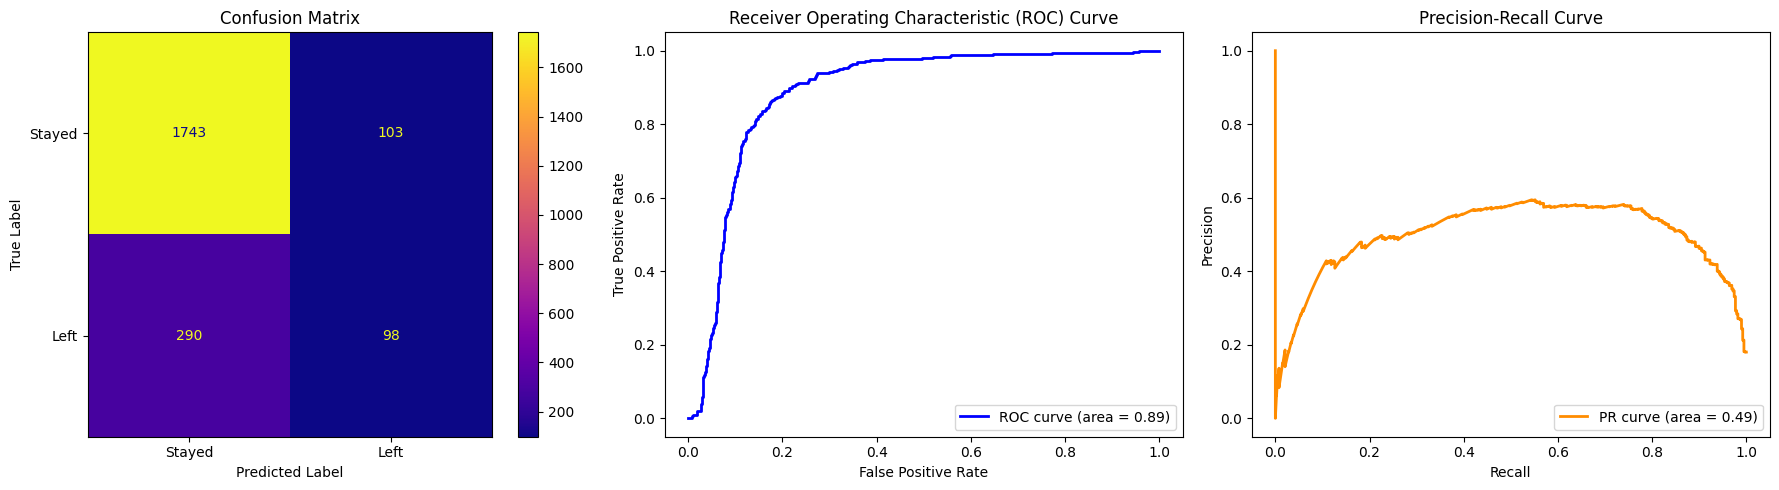

{'Accuracy': 0.824, 'Precision': 0.488, 'Recall': 0.253, 'F1-score': 0.333}

In [27]:
# Create a (1, 3) subplot layout
fig, axs = plt.subplots(1, 3, figsize = (18, 5))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

# Define custom labels for the confusion matrix
labels = ['Stayed', 'Left']

# Plot the confusion matrix using ConfusionMatrixDisplay with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = labels)
disp.plot(cmap = 'plasma', ax = axs[0])
axs[0].set_title('Confusion Matrix')
axs[0].set_xlabel('Predicted Label')
axs[0].set_ylabel('True Label')

# ROC Curve with AUC
fpr, tpr, _ = roc_curve(y_test, logistic.decision_function(X_test))
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
axs[1].plot(fpr, tpr, color = 'blue', lw = 2, label = f'ROC curve (area = {roc_auc:.2f})')
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axs[1].legend(loc = 'lower right')

# Precision-Recall Curve with AUC
precision_curve, recall_curve, _ = precision_recall_curve(y_test, logistic.decision_function(X_test))
pr_auc = auc(recall_curve, precision_curve)

# Plot the precision-recall curve
axs[2].plot(recall_curve, precision_curve, color = 'darkorange', lw = 2, label = f'PR curve (area = {pr_auc:.2f})')
axs[2].set_xlabel('Recall')
axs[2].set_ylabel('Precision')
axs[2].set_title('Precision-Recall Curve')
axs[2].legend(loc = 'lower right')

plt.tight_layout()
plt.show()

# Evaluate model performance
print_metrics(y_test, y_pred_logistic)

### 1b) XGBoost Performance

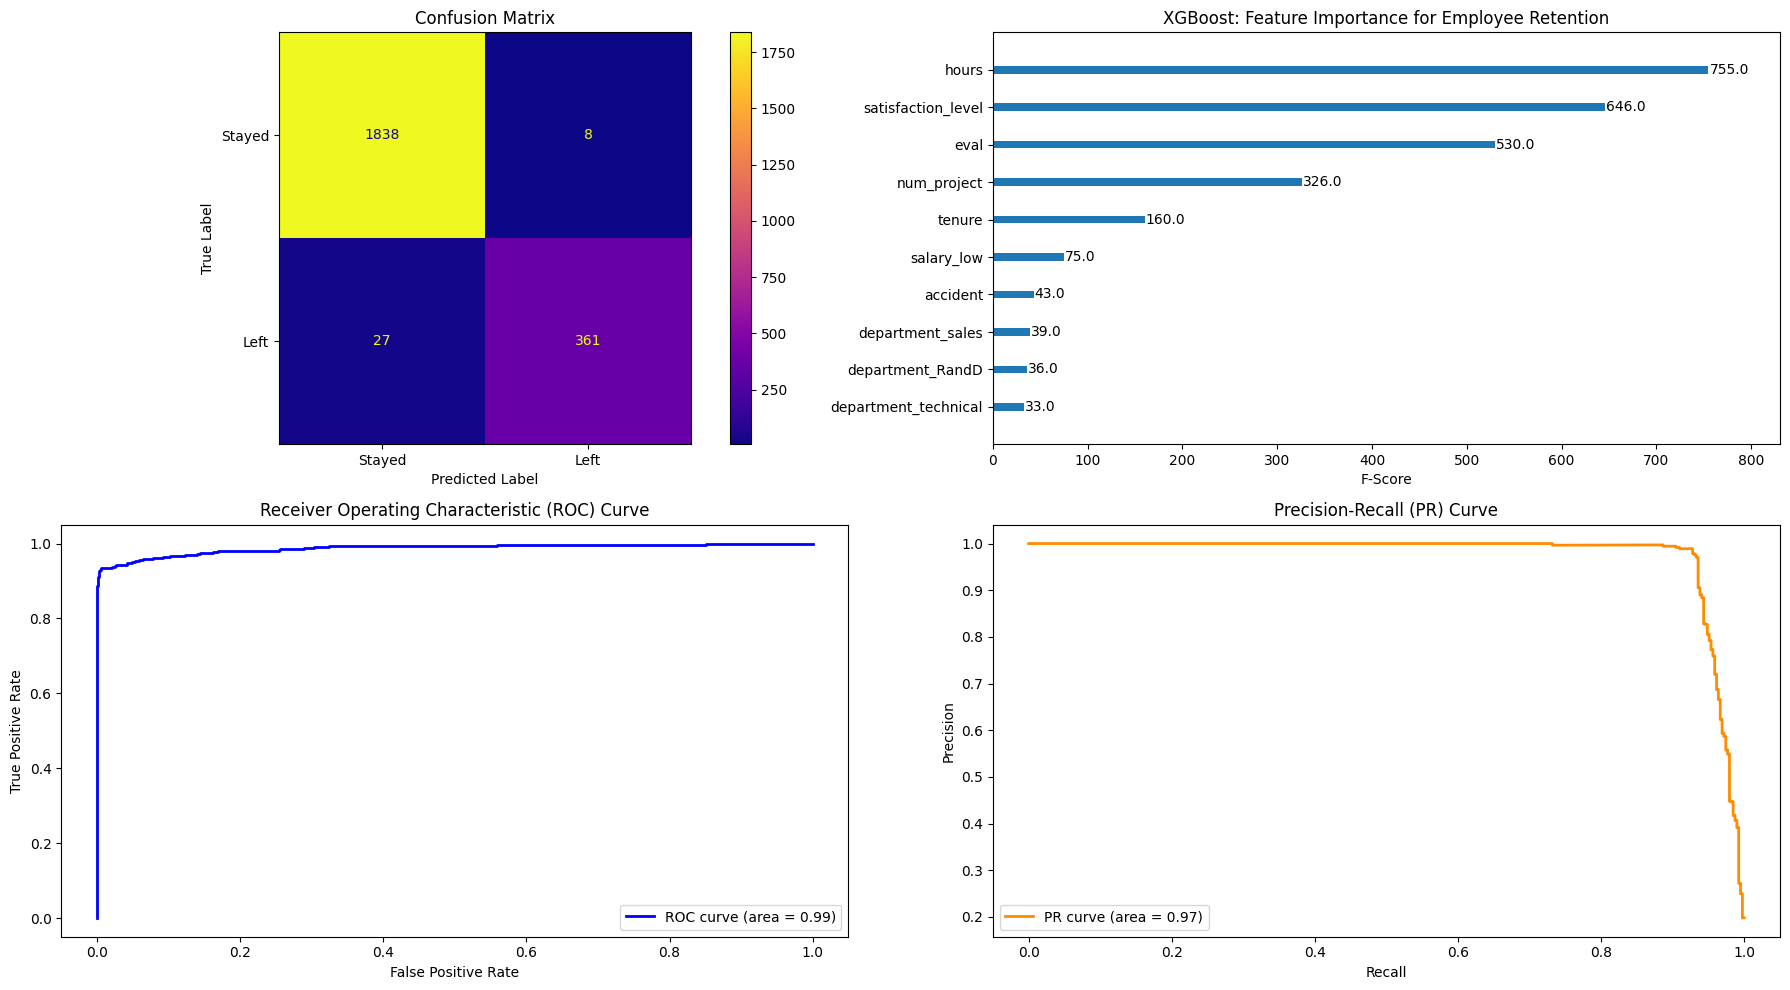

{'Accuracy': 0.984, 'Precision': 0.978, 'Recall': 0.93, 'F1-score': 0.954}

In [28]:
from xgboost import XGBClassifier, plot_tree

# Create a (2, 2) subplot layout
fig, axs = plt.subplots(2, 2, figsize = (18, 10))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Define custom labels for the confusion matrix
labels = ['Stayed', 'Left']

# Plot the confusion matrix using ConfusionMatrixDisplay with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = labels)
disp.plot(cmap = 'plasma', ax = axs[0, 0])
axs[0, 0].set_title('Confusion Matrix')
axs[0, 0].set_xlabel('Predicted Label')
axs[0, 0].set_ylabel('True Label')

# Feature Importance Plot
plot_importance(grid.best_estimator_, ax = axs[0, 1], show_values = True, max_num_features = 10)
axs[0, 1].set_title('XGBoost: Feature Importance for Employee Retention')
axs[0, 1].set_xlabel('F-Score')
axs[0, 1].set_ylabel('')
axs[0, 1].grid(False)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, grid.best_estimator_.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
axs[1, 0].plot(fpr, tpr, color = 'blue', lw = 2, label = f'ROC curve (area = {roc_auc:.2f})')
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('Receiver Operating Characteristic (ROC) Curve')
axs[1, 0].legend(loc = 'lower right')

# Precision-Recall Curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, grid.best_estimator_.predict_proba(X_test)[:, 1])
pr_auc = auc(recall_curve, precision_curve)

# Plot the precision-recall curve
axs[1, 1].plot(recall_curve, precision_curve, color = 'darkorange', lw = 2, label = f'PR curve (area = {pr_auc:.2f})')
axs[1, 1].set_xlabel('Recall')
axs[1, 1].set_ylabel('Precision')
axs[1, 1].set_title('Precision-Recall (PR) Curve')
axs[1, 1].legend(loc = 'lower left')

plt.tight_layout()
plt.show()

# Evaluate model performance
print_metrics(y_test, y_pred_xgb)

### 1c) SVM Performance

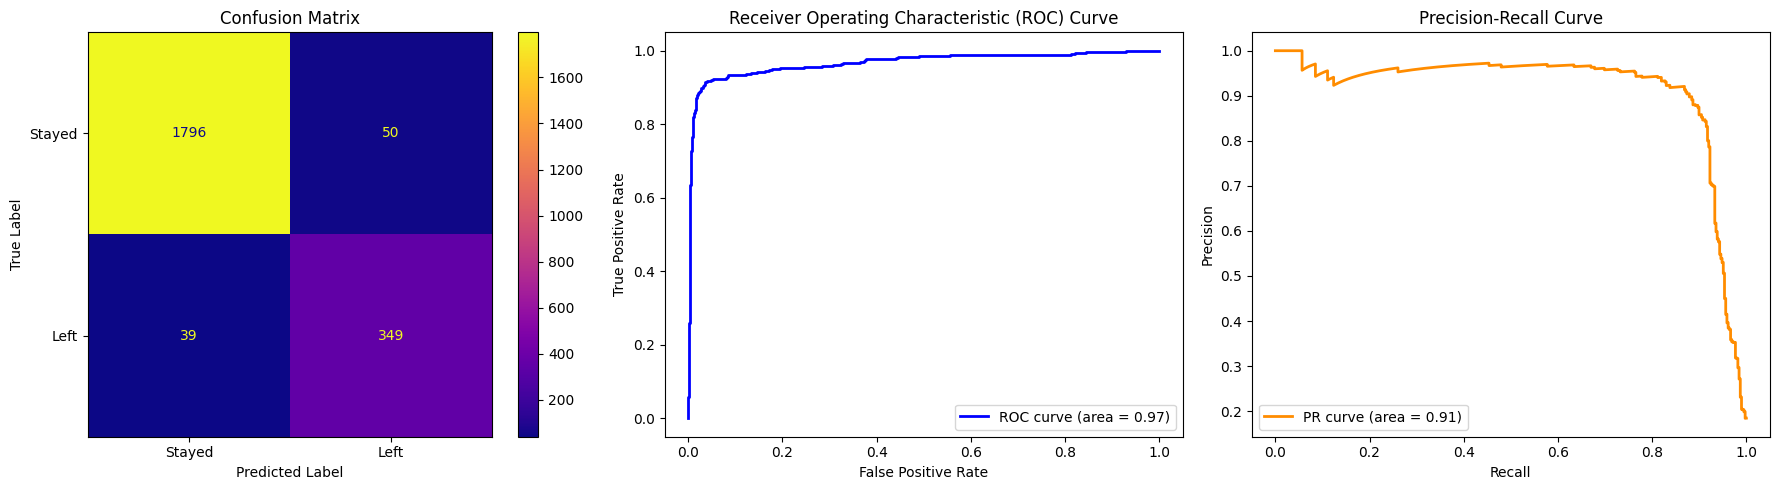

{'Accuracy': 0.96, 'Precision': 0.875, 'Recall': 0.899, 'F1-score': 0.887}

In [29]:
# Create a (1, 3) subplot layout
fig, axs = plt.subplots(1, 3, figsize = (18, 5))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Define custom labels for the confusion matrix
labels = ['Stayed', 'Left']

# Plot the confusion matrix using ConfusionMatrixDisplay with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = labels)
disp.plot(cmap = 'plasma', ax = axs[0])
axs[0].set_title('Confusion Matrix')
axs[0].set_xlabel('Predicted Label')
axs[0].set_ylabel('True Label')

# ROC Curve with AUC
fpr, tpr, _ = roc_curve(y_test, svm_model.decision_function(X_test))
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
axs[1].plot(fpr, tpr, color = 'blue', lw = 2, label = f'ROC curve (area = {roc_auc:.2f})')
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axs[1].legend(loc = 'lower right')

# Precision-Recall Curve with AUC
precision_curve, recall_curve, _ = precision_recall_curve(y_test, svm_model.decision_function(X_test))
pr_auc = auc(recall_curve, precision_curve)

# Plot the precision-recall curve
axs[2].plot(recall_curve, precision_curve, color = 'darkorange', lw = 2, label = f'PR curve (area = {pr_auc:.2f})')
axs[2].set_xlabel('Recall')
axs[2].set_ylabel('Precision')
axs[2].set_title('Precision-Recall Curve')
axs[2].legend(loc = 'lower left')

plt.tight_layout()
plt.show()

# Evaluate model performance
print_metrics(y_test, y_pred_svm)

In [30]:
# Assuming you have the metrics for each model as variables
models = ['Logistic Regression', 'XGBoost', 'SVM']
model_metrics = []

# Calculate metrics for each model and store them in a list of dictionaries
for y_pred in [y_pred_logistic, y_pred_xgb, y_pred_svm]:
    metrics_dict = print_metrics(y_test, y_pred)
    model_metrics.append(metrics_dict)

# Create the DataFrame from the list of dictionaries
metrics_df = pd.DataFrame(model_metrics, index = models)

# Sort the DataFrame by precision in descending order
metrics_df_sorted = metrics_df.sort_values(by = 'Precision', ascending = False)

print(metrics_df_sorted, '\n')

                     Accuracy  Precision  Recall  F1-score
XGBoost                 0.984      0.978   0.930     0.954
SVM                     0.960      0.875   0.899     0.887
Logistic Regression     0.824      0.488   0.253     0.333 



As shown in the table, XGBoost outperformed the other models in all metrics, especially precision, which was our primary metric. It achieved a 10% increase in precision over SVM and a 50% increase over logistic regression. However, it is important to note that this high precision was achieved at the cost of recall, as there were fewer true positives (employees who left) than true negatives (employees who stayed). This is evident in the 5:1 ratio of true negatives to true positives in the confusion matrix. As a result, the precision-recall curve is a better measure of the model's performance than the ROC curve, which is inflated by the high number of true negatives.

Another interesting finding was that the hours worked, satisfaction level, and last evaluation were the most significant variables affecting employee retention. These three variables had a much greater impact on the model's prediction of an employee leaving than the number of projects worked on or the tenure at the company.

Finally, to improve the performance of the model, it may be helpful to test more parameters during the GridSearchCV implementation. Additionally, exit interviews that include questions about the amount of hours worked, satisfaction level, and last evaluation could provide further insight into the factors that contribute to employee retention.

# Summary

### Scenario

Salifort Motors is a manufacturing company that is facing high employee turnover. The company is seeking to improve employee retention by understanding the factors that are most likely to cause employees to leave.

### Response

The company's HR department conducted a survey of employees to gather data on factors such as job satisfaction, workload, and compensation. This data was used to build a machine learning model that predicts whether an employee is likely to leave the company.

### Impact

The developed model enables Salifort Motors to predict with high precision an employee's likelihood to leave the company. As a result, HR can make informed decisions and implement strategies addressing the following factors:

- Long work hours (208.2 hours on average)
- Low satisfaction levels (0.4 out of 1)
- Low evaluations (positive correlation between scores and satisfaction)
- Working on too many projects at once (> 4)
- Short employment period (70% leave by 4 years)

### Insights/Next Steps

1. **Balancing Workload and Overtime:** Recognize and reward employees who put in longer hours, but also provide flexibility for those who cannot or choose not to work overtime. Clarify overtime pay policies and ensure all employees are aware of the company's expectations regarding workload and time off.

2. **Cultivate Transparent Work Culture:** Encourage open company-wide and team-specific discussions to gain insights into the company's work culture. Address any identified issues to foster a positive and supportive work environment.

3. **Fair Evaluation and Reward System:** Reevaluate the evaluation system to ensure that high scores are not solely based on the number of hours worked. Consider implementing a proportionate scale that rewards employees based on their contributions and effort.

4. **Optimize Project Allocation:** Consider implementing a project cap to avoid overburdening employees. This can promote a healthier work-life balance and reduce the risk of employee dissatisfaction.

5. **Recognition for Long-Term Employees:** Evaluate the possibility of promoting employees who have devoted at least four years to the company. Additionally, further investigation is advised to understand any specific concerns or dissatisfactions among four-year tenured employees.